# DoubleDrift

#### Project description:
_Adaptation of experiment 1 (perception) of Lisa & Cavanagh, 2015, Current Biology<br>
(http://dx.doi.org/10.1016/j.cub.2015.08.021) for the AMU Neuroscience Master APP 2024 courses._

#### Hypothesis: 
_Participants mislocalize perceptively the drifting gabor but saccade to correctly to its<br>
 physical position_
 
#### Exercice for APP2024:
_Analyse data to reach an adapted version of Figure 1 of [Lisa & Cavanagh, 2015, Current Biology](http://dx.doi.org/10.1016/j.cub.2015.08.021)_

<img src="img/Lisi_Cavanagh_2015_CB_Figure1.png" width=700 alt="Figure 1">
<!-- ![Lisi_Cavanagh_2015_CB_Figure1.png]()  -->

#### Eye movement data analysis:

- [ ] psychometric staircase
- [ ] psychometric function

In [1]:
# Imports
import os
import numpy as np
import pandas as pd

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plot_utils import plotly_template
import plotly.express as px

In [5]:
# Define folders
base_dir = '..'
data_dir = '{}/data'.format(base_dir)
subject = 'sub-02'
session = 'ses-01'
subject_num = subject[4:]
fig_dir = '{}/{}/{}/beh/figures'.format(data_dir, subject, session)

In [6]:
# Load dataframe
df_all = pd.read_csv('{}/{}/{}/beh/{}_task-DoubleDriftPerception_data.csv'.format(data_dir, subject, session, subject))

#### Perception analysis output graph
- [x] add average lines per run

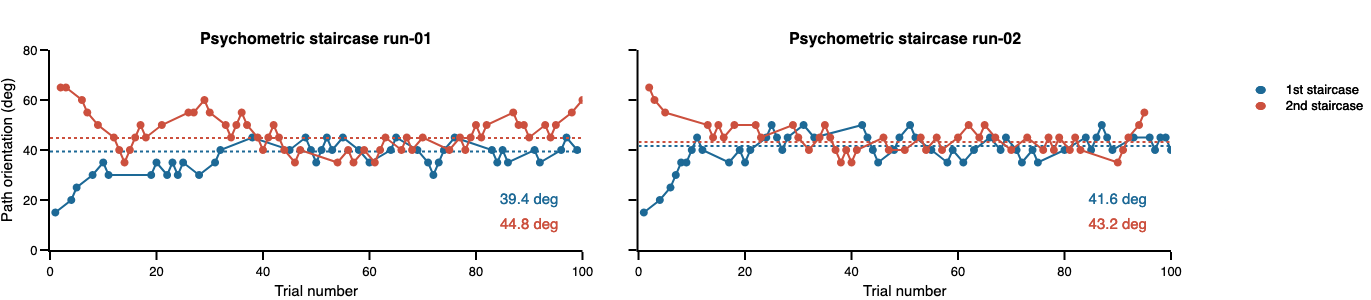

In [76]:
# general figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Helvetica',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

# figure specific settings
colors_panel = px.colors.qualitative.Prism
subplot_titles = ('<b>Psychometric staircase run-01<b>', '<b>Psychometric staircase run-02<b>')

runs = ['run-01', 'run-02']
scs = ['1st staircase', '2nd staircase']
sc_cols = [colors_panel[1], colors_panel[7]]
x_legend = 1.1
y_legend_step = 0.08
y_legend_sc = 0.8
rad_leg = 0.04

# subplot settings
rows, cols = 1, 2
fig_height, fig_width = 300, 500 * cols +100
column_widths, row_heights = [1,1],[1]
sb_specs = [[{},{}]]
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights, shared_yaxes=True, subplot_titles=subplot_titles)

# Right / Left saccades
# ---------------------
for run_num, run in enumerate(runs):
    for sc_num, sc in enumerate(scs):
        if sc_num == 0:y_txt = [20]
        elif sc_num == 1:y_txt = [10]
        # plot
        df_cond = df_all.loc[(df_all.staircase_num == sc_num+1) & (df_all.run_number==run_num+1)]
        
        fig.append_trace(go.Scatter(x=df_cond.trial_number,
                                    y=df_cond.ext_mot_ori,
                                    name=sc, mode='markers+lines', marker_color=sc_cols[sc_num], 
                                    marker_size=8, marker_opacity=1, line_width=2,
                                    marker_line_width=0, marker_symbol='circle'), row=1, col=run_num+1)

        # compute pse
        pse_cond = df_cond.ext_mot_ori[-26:-1].mean()
        x_pse = np.arange(0,101,1)
        y_pse = x_pse * 0 + pse_cond
        fig.append_trace(go.Scatter(x=x_pse, y=y_pse, mode='lines', marker_color=sc_cols[sc_num], 
                                    line_dash='dot', line_width=2), row=1, col=run_num+1)
        fig.append_trace(go.Scatter(x=[90], y=y_txt, mode="text", text="{:2.1f} deg".format(pse_cond),
                         textfont_color=sc_cols[sc_num], textfont_size=15), row=1, col=run_num+1)
        
        # legend
        fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sc - y_legend_step * sc_num, 
                           text=sc, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='circle', xref='paper', yref='paper', fillcolor=sc_cols[sc_num],line_width=0,
                      x0=x_legend - 0.02 - rad_leg / 9, y0=y_legend_sc - y_legend_step * sc_num - rad_leg / 2, 
                      x1=x_legend - 0.02 + rad_leg / 9, y1=y_legend_sc - y_legend_step * sc_num + rad_leg / 2)
    
# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        if col==0:title_y = 'Path orientation (deg)'
        elif col==1: title_y = ''
            
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], 
                         range=[0,100], title='Trial number', row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], 
                         title=title_y, range=[0,80], row=row+1, col=col+1)
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, 
                  margin_r=200, margin_t=50, margin_b=50, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_staircase.pdf'.format(fig_dir, subject))